In [1]:
import numpy, scipy, matplotlib.pyplot as plt, sklearn, librosa, mir_eval, IPython.display
import sklearn.preprocessing
import sklearn.cluster
plt.rcParams['figure.figsize'] = (14, 4)

[&larr; Back to Index](index.html)

# K-Means Clustering

Sometimes, an unsupervised learning technique is preferred.  Perhaps you do not have access to adequate training data, or perhaps the training data's labels are not completely clear.  Maybe you just want to quickly sort real-world, unseen, data into groups based on its feature similarity.

In such cases, clustering is a great option!

Download an audio file:

In [2]:
filename = 'audio/125_bounce.wav'

Play the audio file:

In [3]:
IPython.display.Audio(filename)

Load the audio file into an array.

In [4]:
x, fs = librosa.load(filename)
print(fs)

22050


Plot audio signal:

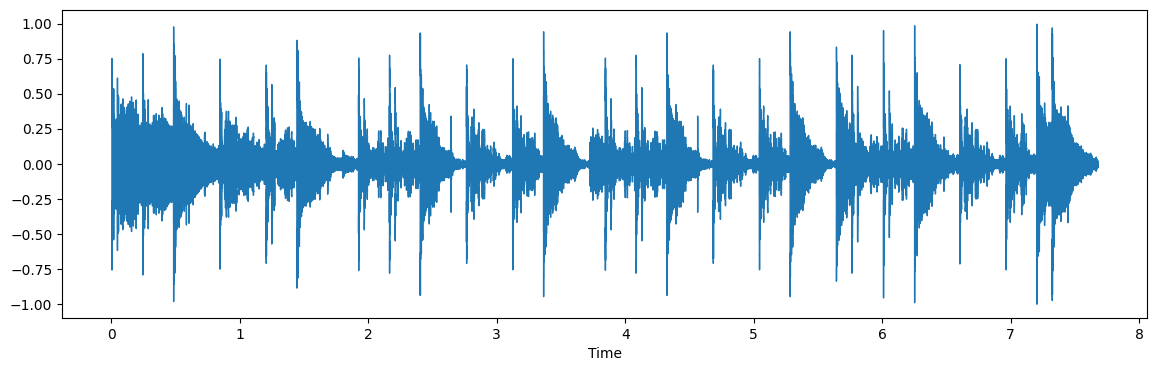

In [5]:
librosa.display.waveshow(y=x, sr=fs);

## Onset Detection

Detect onsets:

In [6]:
onset_frames = librosa.onset.onset_detect(y=x, sr=fs, delta=0.04, wait=4)
onset_times = librosa.frames_to_time(onset_frames, sr=fs)
onset_samples = librosa.frames_to_samples(onset_frames)

Listen to detected onsets:

In [7]:
x_with_beeps = mir_eval.sonify.clicks(onset_times, fs, length=len(x))
IPython.display.Audio(x + x_with_beeps, rate=fs)

## Feature Extraction

Let's compute the zero crossing rate and energy for each detected onset.

Plot the zero crossing rate:

In [8]:
def extract_features(x, fs):
    zcr = librosa.zero_crossings(x).sum()
    energy = scipy.linalg.norm(x)
    return [zcr, energy]

In [9]:
frame_sz = fs*0.090
features = numpy.array([extract_features(x[i:int(i+frame_sz)], fs) for i in onset_samples])
print(features.shape)

(37, 2)


## Feature Scaling

Scale the features (using the scale function) from -1 to 1.

In [10]:
min_max_scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
features_scaled = min_max_scaler.fit_transform(features)
print(features_scaled.shape)
print(features_scaled.min(axis=0))
print(features_scaled.max(axis=0))

(37, 2)
[-1. -1.]
[1. 1.]


Plot the features.

Text(0, 0.5, 'Spectral Centroid (scaled)')

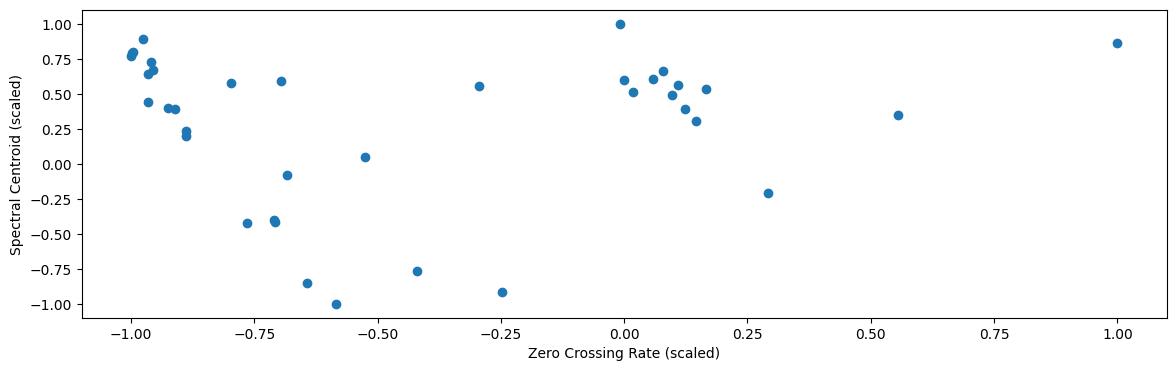

In [11]:
plt.scatter(features_scaled[:,0], features_scaled[:,1])
plt.xlabel('Zero Crossing Rate (scaled)')
plt.ylabel('Spectral Centroid (scaled)')

## Using K-Means

Time to cluster! Let's initialize the algorithm to find three clusters.

In [12]:
model = sklearn.cluster.KMeans(n_clusters=2)
labels = model.fit_predict(features_scaled)
print(labels)

[1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1]


/Users/gijs/Github/iranroman/musicinformationretrieval.com/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Plot the results.

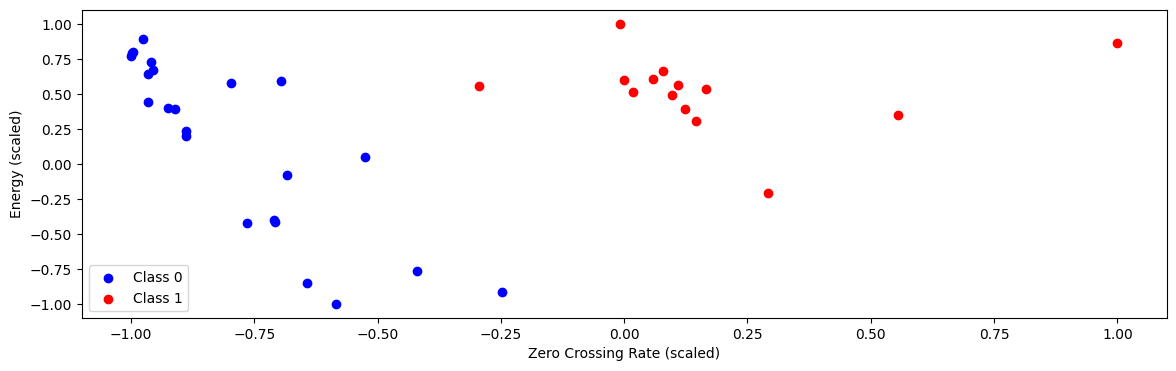

In [13]:
plt.scatter(features_scaled[labels==0,0], features_scaled[labels==0,1], c='b')
plt.scatter(features_scaled[labels==1,0], features_scaled[labels==1,1], c='r')
plt.xlabel('Zero Crossing Rate (scaled)')
plt.ylabel('Energy (scaled)')
plt.legend(('Class 0', 'Class 1'))

Listen to onsets assigned to Class 0:

In [14]:
x_with_beeps = mir_eval.sonify.clicks(onset_times[labels==0], fs, length=len(x))
IPython.display.Audio(x + x_with_beeps, rate=fs)

Class 1:

In [15]:
x_with_beeps = mir_eval.sonify.clicks(onset_times[labels==1], fs, length=len(x))
IPython.display.Audio(x + x_with_beeps, rate=fs)

## Affinity Propagation

In scikit-learn, other clustering algorithms such as *affinity propagation* can cluster without defining the number of clusters beforehand.

All we need to do is swap out `KMeans` for `AffinityPropagation`:

In [16]:
model = sklearn.cluster.AffinityPropagation()
labels = model.fit_predict(features_scaled)
print(labels)

[0 0 0 3 2 3 0 1 0 2 3 0 1 3 2 3 0 1 0 2 3 0 2 3 2 3 0 1 0 3 0 3 2 3 3 0 0]


Plot features:

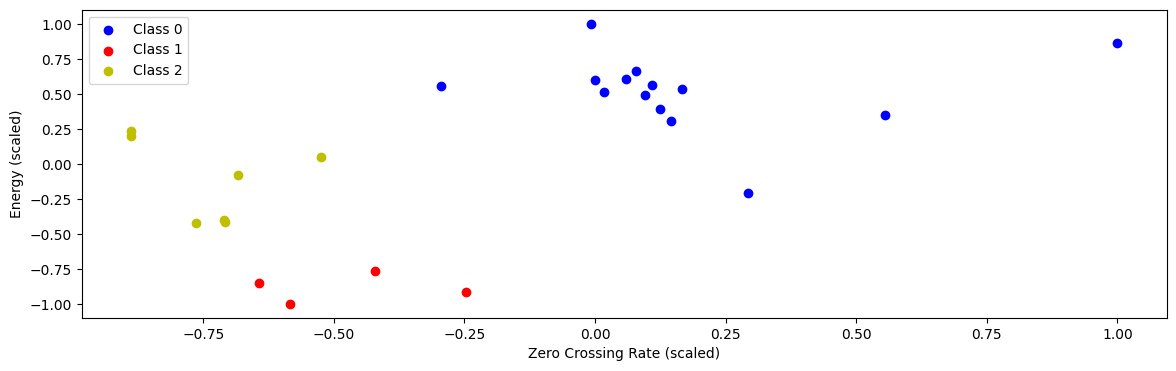

In [17]:
plt.scatter(features_scaled[labels==0,0], features_scaled[labels==0,1], c='b')
plt.scatter(features_scaled[labels==1,0], features_scaled[labels==1,1], c='r')
plt.scatter(features_scaled[labels==2,0], features_scaled[labels==2,1], c='y')
plt.xlabel('Zero Crossing Rate (scaled)')
plt.ylabel('Energy (scaled)')
plt.legend(('Class 0', 'Class 1', 'Class 2'));

Play a beep upon each frame in the same cluster:

Class 0:

In [18]:
x_with_beeps = mir_eval.sonify.clicks(onset_times[labels==0], fs, length=len(x))
IPython.display.Audio(x + x_with_beeps, rate=fs)

Class 1:

In [19]:
x_with_beeps = mir_eval.sonify.clicks(onset_times[labels==1], fs, length=len(x))
IPython.display.Audio(x + x_with_beeps, rate=fs)

Class 2:

In [20]:
x_with_beeps = mir_eval.sonify.clicks(onset_times[labels==2], fs, length=len(x))
IPython.display.Audio(x + x_with_beeps, rate=fs)

[&larr; Back to Index](index.html)